In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/amazon_reviews.csv")

In [6]:
df.head()

,sentiments,cleaned_review,review_score
0,positive,i wish would have gotten one earlier love it a...,5
1,neutral,i ve learned this lesson again open the packag...,1
2,neutral,it is so slow and lags find better option,2
3,neutral,roller ball stopped working within months of m...,1
4,neutral,i like the color and size but it few days out ...,1


In [7]:
df.isnull().sum()

,0
sentiments,0
cleaned_review,3
review_score,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(1347)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['review_length'] = df['cleaned_review'].apply(len)

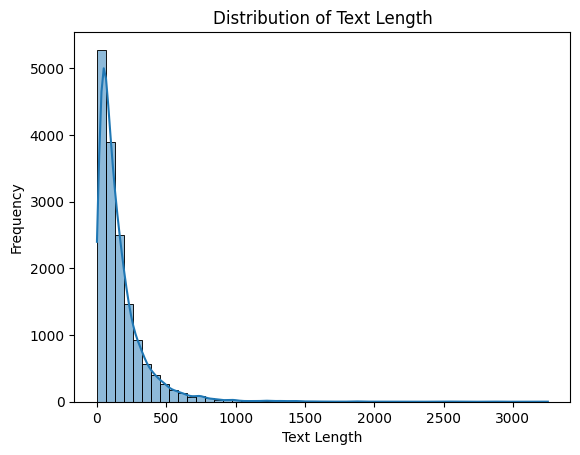

In [12]:
# histogram
sns.histplot(df['review_length'],bins=50,kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

# Word Count/Frequries

In [13]:
from  collections import Counter
import re

def get_words(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]','',text)
  words = text.split()
  return words

all_words = df['cleaned_review'].apply(get_words).sum()
word_counts = Counter(all_words)
print(word_counts.most_common(10))

[('the', 25196), ('it', 21988), ('and', 16675), ('to', 12547), ('for', 9503), ('is', 9264), ('this', 8208), ('my', 6368), ('mouse', 5828), ('of', 5307)]


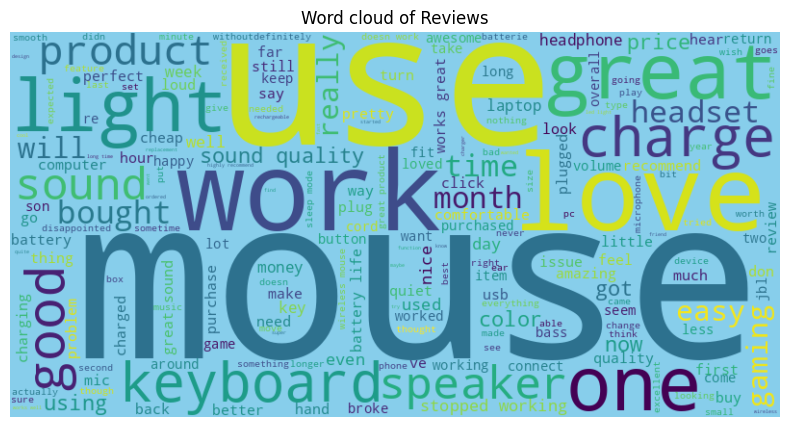

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='skyblue').generate(' '.join(all_words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title(f'Word cloud of Reviews')
plt.show()

In [15]:
df['Tokens'] = df['cleaned_review'].str.split()

In [16]:
df['token_length'] = df['Tokens'].apply(len)

In [17]:
df.head()

,sentiments,cleaned_review,review_score,review_length,Tokens,token_length
0,positive,i wish would have gotten one earlier love it a...,5,93,"[i, wish, would, have, gotten, one, earlier, l...",19
1,neutral,i ve learned this lesson again open the packag...,1,460,"[i, ve, learned, this, lesson, again, open, th...",88
2,neutral,it is so slow and lags find better option,2,41,"[it, is, so, slow, and, lags, find, better, op...",9
3,neutral,roller ball stopped working within months of m...,1,71,"[roller, ball, stopped, working, within, month...",12
4,neutral,i like the color and size but it few days out ...,1,94,"[i, like, the, color, and, size, but, it, few,...",21


In [18]:
df['token_not_stopwords'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [19]:
df['token_not_stopwords_length'] = df['token_not_stopwords'].apply(len)

In [20]:
df.head()

,sentiments,cleaned_review,review_score,review_length,Tokens,token_length,token_not_stopwords,token_not_stopwords_length
0,positive,i wish would have gotten one earlier love it a...,5,93,"[i, wish, would, have, gotten, one, earlier, l...",19,"[wish, would, gotten, one, earlier, love, make...",11
1,neutral,i ve learned this lesson again open the packag...,1,460,"[i, ve, learned, this, lesson, again, open, th...",88,"[learned, lesson, open, package, use, product,...",46
2,neutral,it is so slow and lags find better option,2,41,"[it, is, so, slow, and, lags, find, better, op...",9,"[slow, lags, find, better, option]",5
3,neutral,roller ball stopped working within months of m...,1,71,"[roller, ball, stopped, working, within, month...",12,"[roller, ball, stopped, working, within, month...",10
4,neutral,i like the color and size but it few days out ...,1,94,"[i, like, the, color, and, size, but, it, few,...",21,"[like, color, size, days, return, period, hold...",8


In [21]:
stemmer = PorterStemmer()
df['token_stemmer']=df['token_not_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [22]:
df['token_not_stopwords_length'] = df['token_not_stopwords'].apply(len)

In [23]:
df.head()

,sentiments,cleaned_review,review_score,review_length,Tokens,token_length,token_not_stopwords,token_not_stopwords_length,token_stemmer
0,positive,i wish would have gotten one earlier love it a...,5,93,"[i, wish, would, have, gotten, one, earlier, l...",19,"[wish, would, gotten, one, earlier, love, make...",11,"[wish, would, gotten, one, earlier, love, make..."
1,neutral,i ve learned this lesson again open the packag...,1,460,"[i, ve, learned, this, lesson, again, open, th...",88,"[learned, lesson, open, package, use, product,...",46,"[learn, lesson, open, packag, use, product, ri..."
2,neutral,it is so slow and lags find better option,2,41,"[it, is, so, slow, and, lags, find, better, op...",9,"[slow, lags, find, better, option]",5,"[slow, lag, find, better, option]"
3,neutral,roller ball stopped working within months of m...,1,71,"[roller, ball, stopped, working, within, month...",12,"[roller, ball, stopped, working, within, month...",10,"[roller, ball, stop, work, within, month, mini..."
4,neutral,i like the color and size but it few days out ...,1,94,"[i, like, the, color, and, size, but, it, few,...",21,"[like, color, size, days, return, period, hold...",8,"[like, color, size, day, return, period, hold,..."


In [24]:
stemmer = PorterStemmer()
df['token_stemmer']=df['token_not_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [25]:
df.head()

,sentiments,cleaned_review,review_score,review_length,Tokens,token_length,token_not_stopwords,token_not_stopwords_length,token_stemmer
0,positive,i wish would have gotten one earlier love it a...,5,93,"[i, wish, would, have, gotten, one, earlier, l...",19,"[wish, would, gotten, one, earlier, love, make...",11,"[wish, would, gotten, one, earlier, love, make..."
1,neutral,i ve learned this lesson again open the packag...,1,460,"[i, ve, learned, this, lesson, again, open, th...",88,"[learned, lesson, open, package, use, product,...",46,"[learn, lesson, open, packag, use, product, ri..."
2,neutral,it is so slow and lags find better option,2,41,"[it, is, so, slow, and, lags, find, better, op...",9,"[slow, lags, find, better, option]",5,"[slow, lag, find, better, option]"
3,neutral,roller ball stopped working within months of m...,1,71,"[roller, ball, stopped, working, within, month...",12,"[roller, ball, stopped, working, within, month...",10,"[roller, ball, stop, work, within, month, mini..."
4,neutral,i like the color and size but it few days out ...,1,94,"[i, like, the, color, and, size, but, it, few,...",21,"[like, color, size, days, return, period, hold...",8,"[like, color, size, day, return, period, hold,..."


In [26]:
lemmatizer = WordNetLemmatizer()
df['token_lemmatized']= df['token_not_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [27]:
df.head()

,sentiments,cleaned_review,review_score,review_length,Tokens,token_length,token_not_stopwords,token_not_stopwords_length,token_stemmer,token_lemmatized
0,positive,i wish would have gotten one earlier love it a...,5,93,"[i, wish, would, have, gotten, one, earlier, l...",19,"[wish, would, gotten, one, earlier, love, make...",11,"[wish, would, gotten, one, earlier, love, make...","[wish, would, gotten, one, earlier, love, make..."
1,neutral,i ve learned this lesson again open the packag...,1,460,"[i, ve, learned, this, lesson, again, open, th...",88,"[learned, lesson, open, package, use, product,...",46,"[learn, lesson, open, packag, use, product, ri...","[learned, lesson, open, package, use, product,..."
2,neutral,it is so slow and lags find better option,2,41,"[it, is, so, slow, and, lags, find, better, op...",9,"[slow, lags, find, better, option]",5,"[slow, lag, find, better, option]","[slow, lag, find, better, option]"
3,neutral,roller ball stopped working within months of m...,1,71,"[roller, ball, stopped, working, within, month...",12,"[roller, ball, stopped, working, within, month...",10,"[roller, ball, stop, work, within, month, mini...","[roller, ball, stopped, working, within, month..."
4,neutral,i like the color and size but it few days out ...,1,94,"[i, like, the, color, and, size, but, it, few,...",21,"[like, color, size, days, return, period, hold...",8,"[like, color, size, day, return, period, hold,...","[like, color, size, day, return, period, hold,..."
